# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We will import for you the following dataset of ingredients with their mineral content

In [5]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/gradient_descent_ingredients_zinc_phosphorous.csv")
data


,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704
5,Rice. red. cooked. unsalted,0.251889,0.266910
6,Wild rice. cooked. unsalted,0.337531,0.131627
7,Pearled barley. boiled/cooked in water. unsalted,0.206549,0.080439
8,Millet. cooked. unsalted,0.229219,0.164534
9,Quinoa. boiled/cooked in water. unsalted,0.274559,0.259598


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

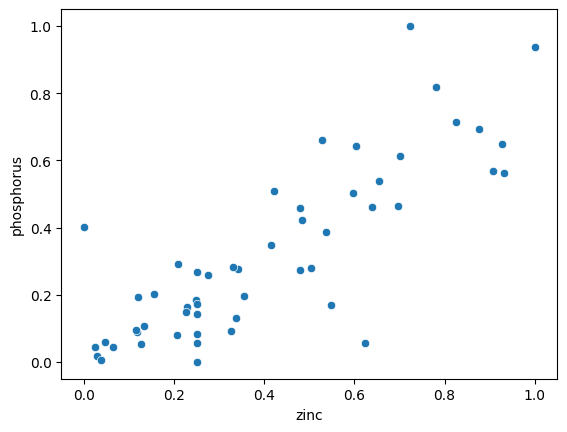

In [6]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');


❓ Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [7]:
# YOUR CODE HERE
# create data_X for zinc
data_X = data['zinc'].values
# create data_y for phosphorus
data_Y = data['phosphorus'].values

data_X.shape, data_Y.shape


((53,), (53,))

In [8]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))


## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

❓ Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [9]:
def h(X,a,b):
    # a is the slope
    # b is the intercept

    return a * X + b


### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [10]:
import numpy as np

def loss(X,Y,a,b):
    # X is the data_X
    # Y is the data_Y
    # a is the slope
    # b is the intercept

    loss = np.sum((h(X,a,b) - Y)**2)

    # round to 2 decimals loss
    return round(loss, 3)


❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [11]:
# YOUR CODE HERE
loss(data_X, data_Y, 1, 1)


63.869

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


<details>
<summary>💡 Hint</summary>
Again, you must re-use the Hypothesis Function in your new function to compute the predictions at given points.
</details>

In [12]:
def gradient(X,Y,a,b):

    d_a_ = np.sum(-2 * (Y - h(X,a,b)) * X)
    d_b_ = np.sum(-2 * (Y - h(X,a,b)))

    return d_a_, d_b_


❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [13]:
# YOUR CODE HERE
gradient(data_X, data_Y, 1, 1)


(48.459065809109006, 115.17923733301406)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

❓ Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [14]:
def steps(d_a,d_b, learning_rate = 0.01):

    step_a = d_a * learning_rate
    step_b = d_b * learning_rate

    return (step_a, step_b)


❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [15]:
# YOUR CODE HERE
d_a , d_b = gradient(data_X, data_Y, 1, 1)

steps(d_a, d_b , learning_rate = 0.01)


(0.4845906580910901, 1.1517923733301405)

⚠️ The steps should be 0.48 for `a` and 1.15 for `b`

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

❓ Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [16]:
def update_params(a, b, step_a, step_b):

    updated_a = a - step_a
    updated_b = b - step_b

    return updated_a , updated_b


### 2.6 One full epoch

❓ Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [17]:
# YOUR CODE HERE

step_a, step_b = steps(d_a, d_b , learning_rate = 0.01)
update_params(1, 1, step_a, step_b)


(0.5154093419089099, -0.1517923733301405)

⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

❓ Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [27]:
# YOUR CODE HERE
a = 1
b = 1
n_epochs = 100

loss_history = []
a_history = []
b_history = []


for i in range(n_epochs):
    # print(loss(data_X, data_Y, a, b))
    loss_history.append(loss(data_X, data_Y, a, b))
    d_a, d_b = gradient(data_X, data_Y, a, b)
    step_a, step_b = steps(d_a, d_b, learning_rate=0.01)
    a, b = update_params(a, b, step_a, step_b)
    a_history.append(a)
    b_history.append(b)
    print(f"a, b at epoch {i} is : {a},{b}")

print(
    f"Loss, a, b at epoch 100 is : {loss_history[-1]},{a_history[-1]},{b_history[-1]}"
)


a, b at epoch 0 is : 0.5154093419089099,-0.1517923733301405
a, b at epoch 1 is : 0.6475338480410271,0.1253351689484678
a, b at epoch 2 is : 0.6273545046153022,0.05199049289780815
a, b at epoch 3 is : 0.6437520254549167,0.0650535505555884
a, b at epoch 4 is : 0.6504040813696262,0.05723081117298024
a, b at epoch 5 is : 0.6587355634769616,0.05484465067703296
a, b at epoch 6 is : 0.6659889132103662,0.05141136896993313
a, b at epoch 7 is : 0.6728856930511895,0.04850372390367696
a, b at epoch 8 is : 0.6792902431448742,0.045717605226107995
a, b at epoch 9 is : 0.685274609433956,0.04313549419319603
a, b at epoch 10 is : 0.6908572504746171,0.04072151480231099
a, b at epoch 11 is : 0.6960673673055952,0.038469895918032446
a, b at epoch 12 is : 0.7009292694951631,0.03636844869256201
a, b at epoch 13 is : 0.7054663644254688,0.034407469100029356
a, b at epoch 14 is : 0.7097003182996756,0.03257749130625461
a, b at epoch 15 is : 0.7136513932777129,0.030869782620625882
a, b at epoch 16 is : 0.717338487

❓ What are the parameter values at the end of the 100 epochs? Save them to respective variables `a_100` and `b_100` 

In [19]:
# YOUR CODE HERE
a_100 = a_history[-1]
b_100 = b_history[-1]


In [20]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/04-Under-the-hood/data-batch-gradient-descent/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Visual check

❓ Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [50]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):

    history = {
        "loss_history": loss_history,
        "a_history": a_history,
        "b_history": b_history,
    }
    return a_history[-1], b_history[-1], history


❓ Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

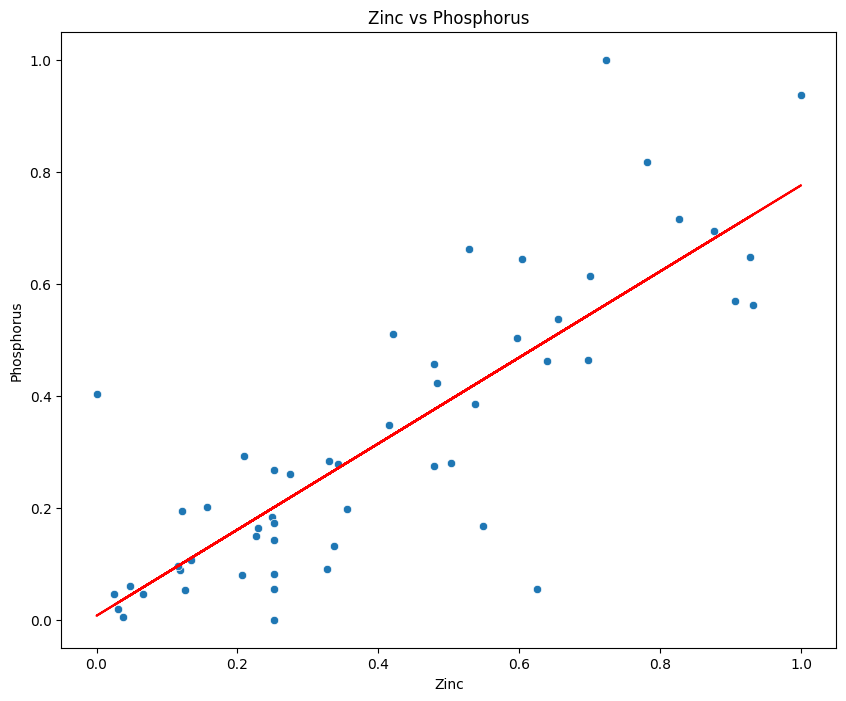

In [51]:
# YOUR CODE HERE
# Plot the line of best fit with the data points
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="zinc", y="phosphorus")
plt.plot(data_X, h(data_X, a_100, b_100), color="red")
plt.title("Zinc vs Phosphorus")
plt.xlabel("Zinc")
plt.ylabel("Phosphorus")
plt.show()


## 5. Visualize your descent

🎯 Our goal is to plot our loss function and the descent steps on a 2D surface using matplotlib [contourf]

❓ Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [30]:
# YOUR CODE HERE
# range_a has 100 values for a between -1 and 1
range_a = np.linspace(-1, 1, 100)

# range_b has 100 values for b between -1 and 1
range_b = np.linspace(-1, 1, 100)

# Z is a 2d-array where each element Z[i,j] is the
# loss for a=range_a[i] and b=range_b[j]
Z = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        Z[i, j] = loss(data_X, data_Y, range_a[i], range_b[j])


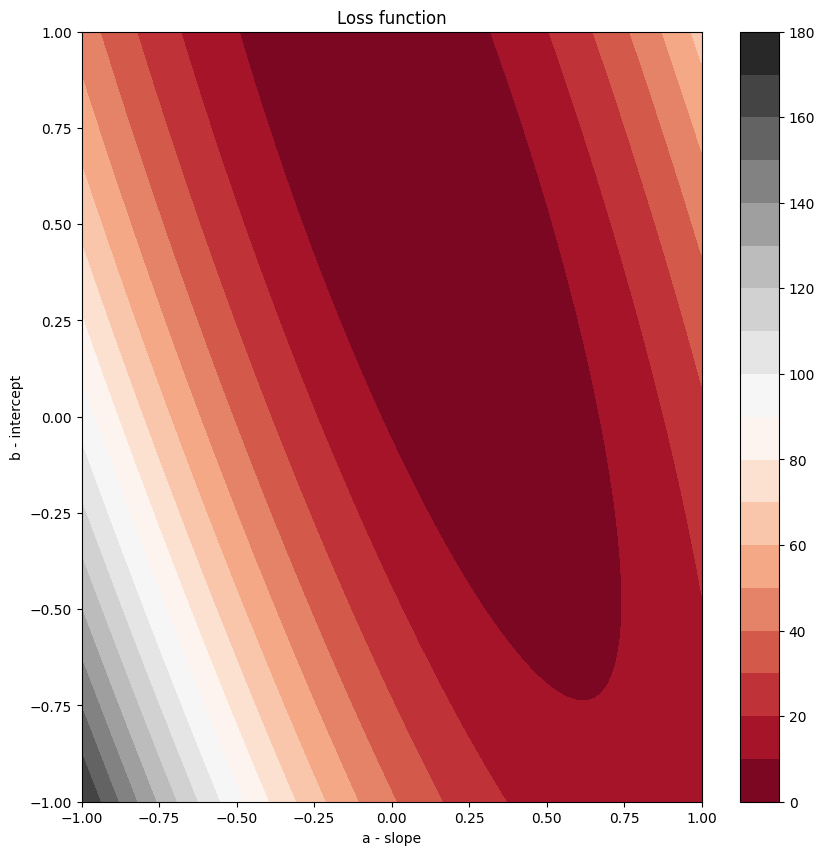

In [45]:
# YOUR CODE HERE
# Plot the loss function and the descent steps on a 2D surface using countourf
plt.figure(figsize=(10, 10))
plt.contourf(range_a, range_b, Z, 20, cmap="RdGy")
plt.colorbar()
plt.xlabel("a - slope")
plt.ylabel("b - intercept")
plt.title("Loss function")
plt.show()


❓ Now, plot in one single subplot:
- your gradient as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with 3 parameters
- all historical (a,b) points as a scatterplot with red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

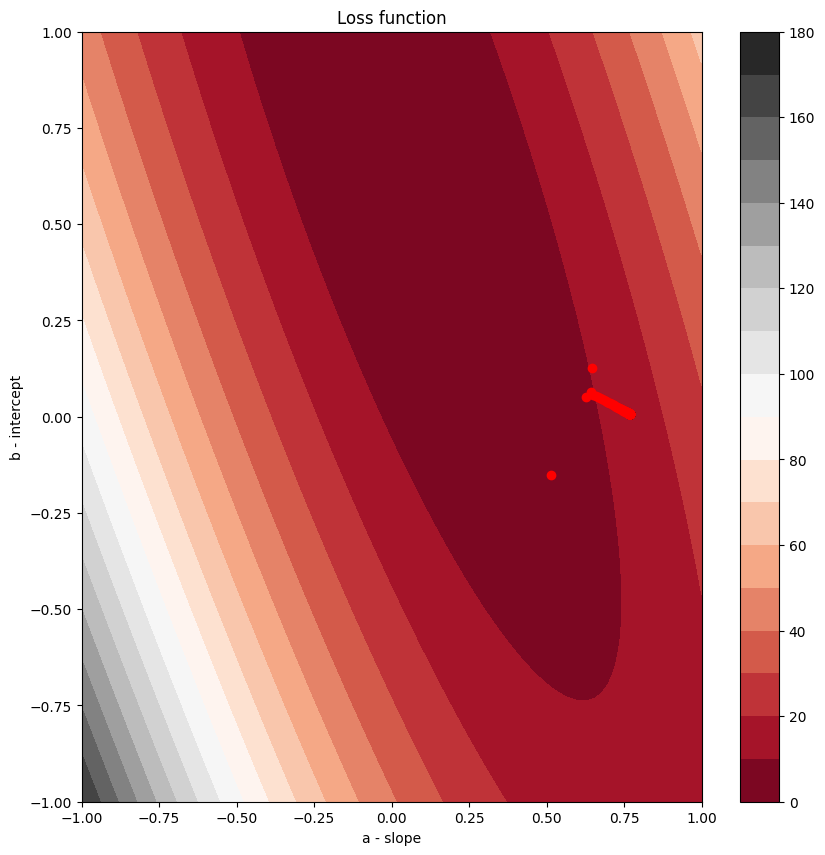

In [57]:
# YOUR CODE HERE
a, b, history = gradient_descent(
    data_X, data_Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100
)
# Plot the historical values of a and b as scatterplot with red dots
plt.figure(figsize=(10, 10))
plt.contourf(range_a, range_b, Z, 20, cmap="RdGy")
plt.colorbar()
plt.xlabel("a - slope")
plt.ylabel("b - intercept")
plt.title("Loss function")

plt.scatter(history["a_history"], history["b_history"], c="r")
plt.show()


❓ [optional] What about 3D? Try to plot the same data on a [plot.ly 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [54]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
# scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
scatter = go.Scatter3d(
    x=history["a_history"],
    y=history["b_history"],
    z=history["loss_history"],
    mode="markers",
)
fig = go.Figure(data=[surface, scatter])

# fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()


❓ Plot the history of the `loss` values as a function of the number of `epochs`. Try with multiple variations of `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

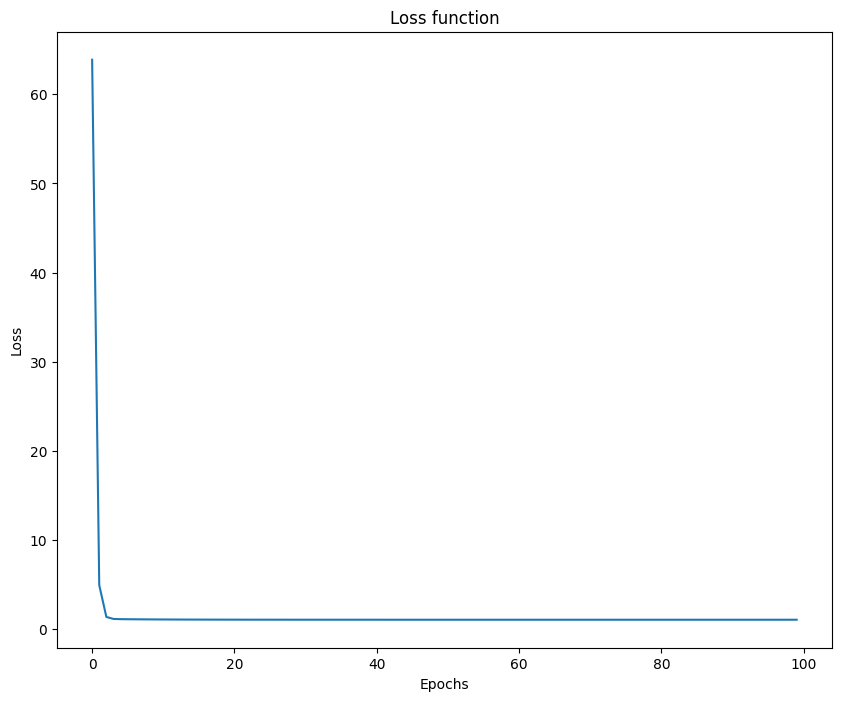

In [58]:
# YOUR CODE HERE
# Plot the history of the loss values as a function of the number of epochs
plt.figure(figsize=(10, 8))
plt.plot(history["loss_history"])
plt.title("Loss function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## 6. With Sklearn...

❓ Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

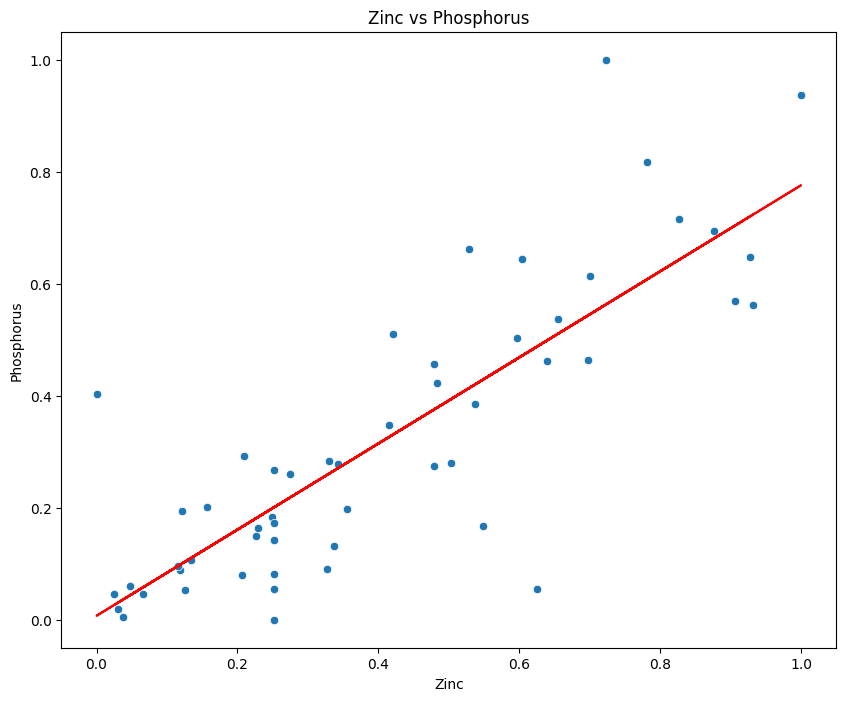

In [59]:
# YOUR CODE HERE
# Train a linear regression model with sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data_X.reshape(-1, 1), data_Y)

# Plot the line of best fit with the data points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="zinc", y="phosphorus")
plt.plot(data_X, h(data_X, model.coef_, model.intercept_), color="red")
plt.title("Zinc vs Phosphorus")
plt.xlabel("Zinc")
plt.ylabel("Phosphorus")
plt.show()


They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done